In [1]:
from fpdf import FPDF
import datetime
from datetime import date
from datetime import datetime, timedelta
import numpy as np
from datetime import *
from matplotlib import pyplot as plt

In [2]:
from garmin import get_activities

In [3]:
act= get_activities()

In [38]:
'''
act["date"]=act["date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S') )
act["date"]= act["date"].apply(lambda x: x.date())
'''

'\nact["date"]=act["date"].apply(lambda x: datetime.strptime(x, \'%Y-%m-%d %H:%M:%S\') )\nact["date"]= act["date"].apply(lambda x: x.date())\n'

In [139]:
pdf = FPDF()
today= datetime.today()
today=today.date()
today1 =today - timedelta(days=30) 
width=210
km_tot=act[act["date"] > today1]["distance"].sum()
km_tot= round(km_tot,2)
d_tot= act[act["date"] > today1]["elevation"].sum()
d_tot = round(d_tot,2)
km_avg=act[act["date"] > today1]["distance"].mean()
km_avg= round(km_avg,2)
d_avg= act[act["date"] > today1]["elevation"].mean()
d_avg = round(d_avg,2)
def create_title(pdf):
  # Unicode is not yet supported in the py3k version; use windows-1252 standard font
  pdf.set_font('Arial', '', 20)  
  pdf.ln(60)
  pdf.write(5, f"Activtity Report, powered by Garmin and Python")
  pdf.ln(10)
  pdf.set_font('Arial', '', 16)
  pdf.write(4, f'From {today1} to {today}')
  pdf.ln(5)

# First Page

In [140]:
pdf.add_page()

pdf.image("/Users/davideesposito/Desktop/Personali/Garmin/head.png", 0, 0,  width) #,w=0,h=0
create_title(pdf)

pdf.set_font('Arial', '', 15)   
pdf.ln(60)
pdf.write(3, f"The total km this month are: {km_tot} km")
pdf.ln(10)
pdf.set_font('Arial', '', 15)   
pdf.write(3, f"The total elevation gain this month is: {km_avg} m")
pdf.ln(10)
pdf.set_font('Arial', '', 15)   
pdf.write(3, f"The total elevation gain this month is: {d_tot} m")
pdf.ln(10)
pdf.set_font('Arial', '', 15)   
pdf.write(3, f"The total elevation gain this month is: {d_avg} m")
pdf.ln(10)



# Second Page

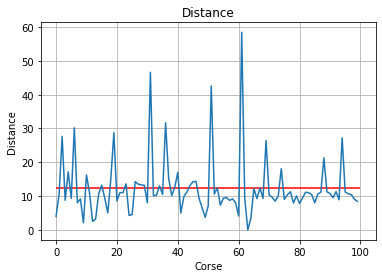

In [141]:
plt.plot(act["distance"])
plt.grid(True)
plt.title("Distance")
plt.hlines(np.mean(act["distance"]),xmin=0,xmax=len(act["distance"]),color="red")
plt.xlabel("Corse")
plt.ylabel("Distance")
plt.savefig('distance.png')

In [142]:
act.head()

,distance,duration,elevation,avghr,vo2,date
0,3.984970,26.425299,209.000000,138.0,58.0,2020-07-24
1,10.512090,53.009851,331.000000,155.0,58.0,2020-07-27
2,27.670141,238.620687,1544.000000,138.0,58.0,2020-07-28
3,8.755710,48.153601,193.000000,140.0,NaN,2020-07-29
4,17.153619,89.631063,148.649567,151.0,NaN,2020-08-01


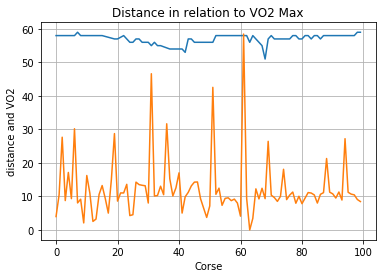

In [143]:
plt.plot(act["vo2"].dropna())
plt.grid(True)
plt.plot(act["distance"])
plt.xlabel("Corse")
plt.ylabel("distance and VO2")
plt.title("Distance in relation to VO2 Max")
plt.savefig('distance_vo2.png')

In [144]:
pdf.add_page()
pdf.set_font('Arial', '', 20)  
pdf.write(20, f"Grafici delle ultime 100 attività")
pdf.image("/Users/davideesposito/Desktop/Personali/Garmin/distance.png", 10,35, w=110,h=70) #,w=0,h=0
pdf.image("/Users/davideesposito/Desktop/Personali/Garmin/distance_vo2.png", 110,35, w=100,h=70) #,w=0,h=0
pdf.ln(100)
pdf.write(20, f"Grafici del mese")
pdf.image("/Users/davideesposito/Desktop/Personali/Garmin/distance_m.png", 10,130, w=110,h=70) #,w=0,h=0
pdf.image("/Users/davideesposito/Desktop/Personali/Garmin/distance_vo2_m.png", 110,130, w=100,h=70) #,w=0,h=0
pdf.output("/Users/davideesposito/Desktop/Personali/Garmin/Report.pdf", 'F')

''

# Mese

In [145]:
# Creazione pdf per mese:
act_month= act[act["date"] > today1]
act_month.head()

,distance,duration,elevation,avghr,vo2,date
72,8.51667,41.512231,32.203552,162.0,57.0,2020-11-04
73,10.01879,55.750700,44.580612,146.0,57.0,2020-11-06
74,18.10066,127.586613,814.652191,148.0,NaN,2020-11-07
75,9.04556,48.038765,44.181137,146.0,57.0,2020-11-09
76,10.39446,48.054049,107.277527,157.0,57.0,2020-11-10


In [146]:
act_month = act_month.reset_index()

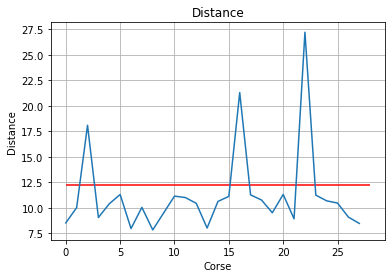

In [147]:
plt.plot(act_month["distance"])
plt.grid(True)
plt.title("Distance")
plt.hlines(np.mean(act["distance"]),xmin=0,xmax=len(act_month["distance"]),color="red")
plt.xlabel("Corse")
plt.ylabel("Distance")
plt.savefig('distance_m.png')

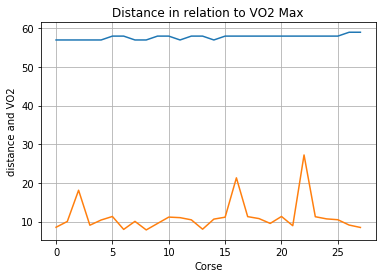

In [148]:
plt.plot(act_month["vo2"].dropna())
plt.grid(True)
plt.plot(act_month["distance"])
plt.xlabel("Corse")
plt.ylabel("distance and VO2")
plt.title("Distance in relation to VO2 Max")
plt.savefig('distance_vo2_m.png')